In [1]:
# Note that calculations using n_range will use whatever value is in TSTR_fit_new at the time the kernel is started

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from TSTR_fit_new import F, F_single
from TSTR_fit_new import n_range

print("n_range={0:.2f}".format(n_range))

n_LXe=1.69
n_list=np.linspace(1.2,2.0,1000)
plt.plot(n_list,F(75*np.pi/180,n_LXe,n_list))
plt.plot(n_list,F_single(75*np.pi/180,n_LXe,n_list,0.5))
plt.figure()
th_list=np.linspace(0,85,1000)
def theta_prime(theta_i):
    return 0.5 * np.arccos(np.cos(theta_i) * np.cos(th_list*np.pi/180) -
        np.sin(theta_i) * np.sin(th_list*np.pi/180))
n_PTFE=1.586
plt.plot(th_list,F(th_list*np.pi/180,n_LXe,n_PTFE),label="F(theta)")
th_i_list=[45,52,60,67,75]
for th_i in th_i_list:   
    plt.plot(th_list,F(theta_prime(th_i*np.pi/180),n_LXe,n_PTFE),label="theta_i={0}".format(th_i))
plt.legend()
plt.figure()
plt.plot(th_list,F_single(th_list*np.pi/180,n_LXe,n_PTFE),label="F_single(theta)")
for th_i in th_i_list:   
    plt.plot(th_list,F_single(theta_prime(th_i*np.pi/180),n_LXe,n_PTFE),label="theta_i={0}".format(th_i))
plt.legend()
plt.figure()
plt.plot(th_list,F_single(theta_prime(60*np.pi/180),n_LXe,1.55),label="60")
plt.plot(th_list,F_single(theta_prime(67*np.pi/180),n_LXe,1.45),label="67")
plt.plot(th_list,F_single(theta_prime(75*np.pi/180),n_LXe,1.35),label="75")
plt.legend()
plt.ylim(0,1.1)
#plt.figure()
#plt.plot(th_list,theta_prime(75*np.pi/180)*180/np.pi)

plt.figure()
plt.plot(th_list,F_single(theta_prime(60*np.pi/180),n_LXe,n_PTFE),label="unpolarized")
plt.plot(th_list,F_single(theta_prime(60*np.pi/180),n_LXe,n_PTFE,polarization=0),label="vertical")
plt.plot(th_list,F_single(theta_prime(60*np.pi/180),n_LXe,n_PTFE,polarization=1),label="horizontal")
plt.legend()

print(F_single(theta_prime(75*np.pi/180),n_LXe,1.586)[0])
print(F_single(theta_prime(67*np.pi/180),n_LXe,1.586)[0])
print(F(67*np.pi/180,n_LXe,1.586))

n_range=0.00
0.001437654243325244
0.001240707714299081
0.1127409467709584


0.8696138928857131
0.8579849777867954
0.8417133622594929
0.7455244771295149
0.8841652845892054
0.952211746870284


C:\Users\swkra\Anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


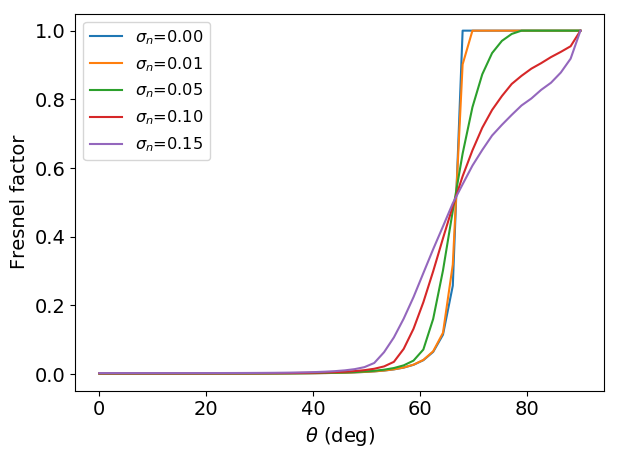

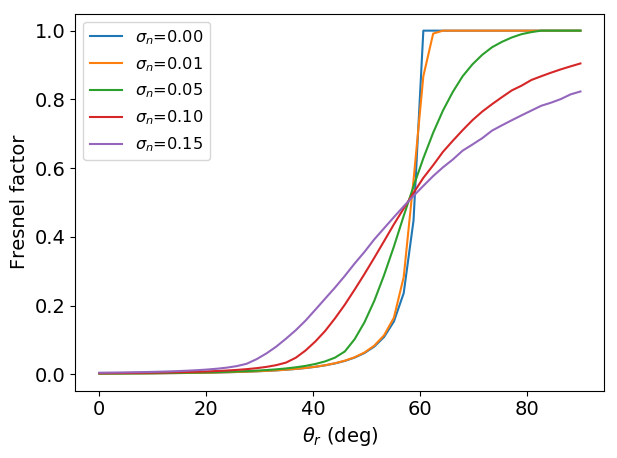

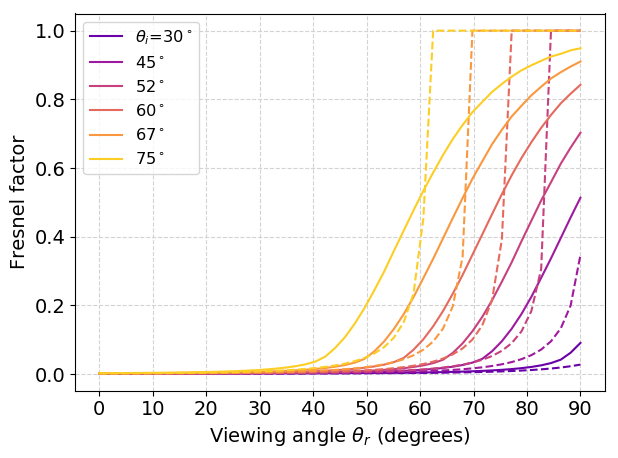

In [9]:
plt.style.use('default')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['legend.fontsize'] = 'small'
matplotlib.rcParams['figure.autolayout'] = True

from TSTR_fit_new import F_wavelength_range

def th_prime(th_i, th_r):
    return 0.5 * np.arccos(np.cos(th_i) * np.cos(th_r) -
        np.sin(th_i) * np.sin(th_r))

theta_list = np.linspace(0,np.pi/2,50)
sigma_n_list = np.array([0.0001,0.01,0.05,0.1,0.15])
F1=plt.figure()
for sigma_n in sigma_n_list:
    plt.plot(theta_list*180/np.pi, F_wavelength_range(theta_list, 1.56, sigma_lambda=sigma_n*20),label="$\sigma_n$={0:.2f}".format(sigma_n))
plt.legend()
plt.xlabel(r"$\theta$ (deg)")
plt.ylabel("Fresnel factor")
#DefaultSize = F1.get_size_inches()
#F1.set_size_inches((DefaultSize[0]*2, DefaultSize[1]*2))

plt.figure()
for sigma_n in sigma_n_list:
    th_prime_list=th_prime(75*np.pi/180,theta_list)
    plt.plot(theta_list*180/np.pi, F_wavelength_range(th_prime_list, 1.56, sigma_lambda=sigma_n*20),label="$\sigma_n$={0:.2f}".format(sigma_n))
plt.legend()
plt.xlabel(r"$\theta_r$ (deg)")
plt.ylabel("Fresnel factor")

# Set n_samples in F_wavelength_range to at least 50 for smooth curves
sigma_n=1.49/20
th_i_list=np.array([30,45,52,60,67,75])*np.pi/180
colors=[plt.cm.plasma(i) for i in np.linspace(0.2,0.90,len(th_i_list))]
fig, ax = plt.subplots()
for ii in range(len(th_i_list)):
    th_i=th_i_list[ii]
    th_prime_list=th_prime(th_i,theta_list)
    plt.plot(theta_list*180/np.pi, F(th_prime_list, 1.69100164, 1.57),color=colors[ii],linestyle="--")
    if ii==0: label_prefix=r"$\theta_i$="
    else: label_prefix=""
    plt.plot(theta_list*180/np.pi, F_wavelength_range(th_prime_list, 1.57, sigma_lambda=sigma_n*20),label=label_prefix+"{0:.0f}$^\circ$".format(th_i*180/np.pi),color=colors[ii])
#     plt.plot(theta_list*180/np.pi, F_wavelength_range(th_prime_list, 1.58, sigma_lambda=sigma_n*20),label=label_prefix+"{0:.0f}$^\circ$".format(th_i*180/np.pi),color=colors[ii],linestyle=":")
    print(F_wavelength_range(th_prime(th_i,th_i), 1.58, sigma_lambda=sigma_n*20)/F_wavelength_range(th_prime(th_i,th_i), 1.57, sigma_lambda=sigma_n*20))
plt.legend()
# Set x-axis tick marks to every 10 deg
loc = matplotlib.ticker.MultipleLocator(base=10.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.grid(b=True,which='major',color="lightgray",linestyle='--')
#plt.text(0.35,0.8,r"$\sigma_n$={0:.2f}".format(sigma_n),transform=plt.gca().transAxes,fontsize=13)
plt.xlabel(r"Viewing angle $\theta_r$ (degrees)")
plt.ylabel("Fresnel factor")
# plt.savefig('F_combined.pdf') 
# Can alternatively save as .png 

In [14]:
# print(F_single(0,1.0,1.40)*1.1*700/.0306)
# print(F_single(0,1.0,1.43)*1.11*700/.0306)
# print(F_single(0,1.0,1.5)*1.51*700/.0306)
# print(F_single(0,1.0,1.69)*2.39*.75*700/.0306)
# print(F_single(0,1.0,1.9)*6.09*700/.0306)
# print(1.1*700/1.1)
# print(1.11*700/1.1)
# print(1.51*700/1.1)
# print(2.39*.75*700/1.1)
# print(6.09*700/1.1)
# print(1.53/1.5) # Fused silica n at 220 nm vs n_LXe
# print(1.49/1.43)
# print(1.47/1.40)
# print(F_single(0,1.53,1.5))
# print(F_single(0,1.49,1.43))
# print(F_single(0,1.47,1.40))
print(F_single(0,1.0,1.53))
print(F_single(0,1.0,1.49))
print(F_single(0,1.0,1.47))

0.043884453748691585
0.038725181851905606
0.03620777262371126


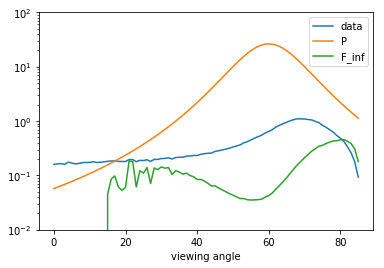

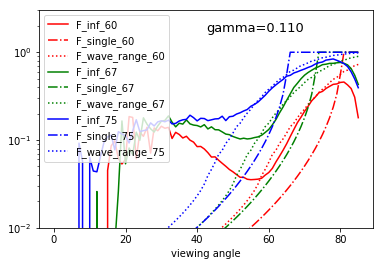

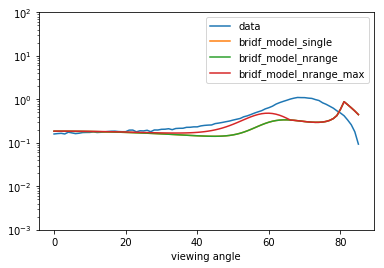

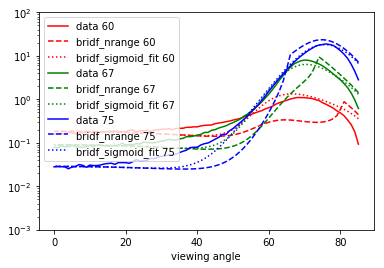

In [8]:
from TSTR_fit_new import H, F_sigmoid, F_wavelength_range
import scipy.special, scipy.optimize

# data from LZ skived, lowp 1, 0.753 scaling factor
th_r_deg=np.array([85.0, 84.0, 83.0, 82.0, 81.0, 80.0, 79.0, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 70.0, 69.0, 68.0, 67.0, 66.0, 65.0, 64.0, 63.0, 62.0, 61.0, 60.0, 59.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0, 36.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0])
th_r_deg += 0
th_r=th_r_deg*np.pi/180
bridf_s9_60=np.array([0.09325641739893645, 0.1791476847467617, 0.26105107307927694, 0.334846240357381, 0.4195094635504942, 0.484489871689139, 0.5436202795902255, 0.6259728744200818, 0.6943198757924738, 0.768280482916234, 0.8326902601412216, 0.9385044657116004, 0.9866695709143418, 1.0498616820393534, 1.0671450775457623, 1.094086080848766, 1.0958912316528637, 1.1037580248369456, 1.0638817849196611, 1.0147431151437254, 0.9518043936782764, 0.896507861607313, 0.8401985754755419, 0.7773104269370908, 0.6956524761104105, 0.6429002410712723, 0.6037086711898949, 0.54927821821899, 0.5163070426862263, 0.4837955830933606, 0.4487061041732089, 0.41780194467589393, 0.3977121883701538, 0.36375430201754233, 0.3483153089396855, 0.33342038889601056, 0.3169304851713316, 0.30578838927525237, 0.2943411358013198, 0.284462568686218, 0.2767607901202778, 0.25759118456356617, 0.25541215366249376, 0.2515944745102707, 0.24501299059002601, 0.23275995147801745, 0.23287081086192948, 0.22770742791974868, 0.22712434154472205, 0.21629285861808933, 0.21590181664126834, 0.21355172298640648, 0.20049952718694072, 0.21091081095552316, 0.20560255103721362, 0.20454236658361805, 0.19705728463937525, 0.1974903227177476, 0.18058464200742827, 0.19451606528597243, 0.18774739649736266, 0.18927954215525006, 0.17933986905067775, 0.19645699626636784, 0.19599815545138338, 0.18055021664804025, 0.18029135376514407, 0.18165141558525513, 0.1854540244304119, 0.18467657627399553, 0.18183001458862236, 0.1782861883448313, 0.17475884088230592, 0.17292652281193616, 0.17854144511975673, 0.17350131911363217, 0.173163325779876, 0.1722572752945949, 0.16630503563762347, 0.16282573579226092, 0.1690390314926917, 0.17556108174276583, 0.15984151127211232, 0.16541347281996377, 0.16316323146383224, 0.15970577125332638])
err_s9_60=np.array([0.04409030513995689, 0.03284157930891784, 0.03427251630413843, 0.03684708351838855, 0.03634273224995402, 0.04570895101272168, 0.05501584434147773, 0.0588244271112608, 0.06425627495783781, 0.06697044627847284, 0.07458398077060373, 0.08596378471482288, 0.0807647055765382, 0.08311142888135989, 0.08293008719438594, 0.08611621962989041, 0.07550653005194588, 0.0848473542933504, 0.07661347999042298, 0.07460273393320796, 0.07496847546494032, 0.06780158654345612, 0.06390850304464502, 0.06451832947684281, 0.05695401534290156, 0.05368327517193631, 0.057399663057799796, 0.053397579110681444, 0.04819848261148317, 0.045206905668507984, 0.04258243903969471, 0.043485400595647684, 0.04406923265863843, 0.037329379836885494, 0.03718764114413311, 0.03612526667469573, 0.033642790001068346, 0.03339799454043215, 0.03346098253955795, 0.03445610884501287, 0.035780792713594155, 0.032154249708885245, 0.033979556566864653, 0.031766887968837226, 0.03132790592664061, 0.03286762832848281, 0.03549289010995897, 0.029130336504121015, 0.03101349960627008, 0.033353625781557185, 0.031931517001168454, 0.029593814184187703, 0.03319847510319467, 0.029627058059088673, 0.03077881406343135, 0.027744364514391526, 0.029077811655383253, 0.030332343937805012, 0.030708262852919294, 0.03080617751663895, 0.028740600358825582, 0.029867112145411812, 0.02990890391681544, 0.029973219924459255, 0.0336451195440606, 0.029323679295279553, 0.030182997827342534, 0.03056378606119835, 0.029375981025515915, 0.02797925205615007, 0.030080203268587864, 0.0372748146060702, 0.031175345573225058, 0.031118921440513952, 0.027515329370002846, 0.029026588364362706, 0.026984068074588773, 0.02900838024376208, 0.02792290321453247, 0.02692735775402668, 0.027856815590848405, 0.028012170734378884, 0.027607944918460983, 0.028664170999722804, 0.029824840400838208, 0.028316284816249853])
bridf_s9_67=np.array([0.6147670615553932, 0.9659762648917652, 1.393156385889123, 1.8458530388534842, 2.2966707129017823, 2.7926405599696236, 3.2796410751980125, 3.821137348018071, 4.490762300308641, 5.143521981591715, 5.90739538946306, 6.48040987697424, 7.093544562482547, 7.559156710248517, 7.893097712749541, 7.992645165379151, 7.73495941989101, 7.15013814224132, 6.49838352820364, 5.438381631325097, 4.444999549832891, 3.529579238265276, 2.799341495428242, 2.14524809263579, 1.6737401374262248, 1.316234743037866, 1.072324347777892, 0.8721164458252297, 0.7290843207083146, 0.6230985649592602, 0.5298121111763634, 0.45733420346259074, 0.40709301515356494, 0.35171095195901797, 0.31898929111056257, 0.2913301233770679, 0.2702558298431672, 0.24571246197061206, 0.23182683470709517, 0.21907831638519343, 0.2008369895936043, 0.19420829607855675, 0.17353468736032773, 0.17308498283491885, 0.15642934752316978, 0.15037370850505244, 0.14326210376696433, 0.13841653389944877, 0.13889376844041607, 0.12667249927998314, 0.1232709233092029, 0.1152894249097024, 0.11707093686261136, 0.12070598571811667, 0.11296321457481294, 0.10989944641399765, 0.10446996469298135, 0.09955456324899363, 0.10021832848751622, 0.10165150849232321, 0.10410223482887478, 0.09377570000567771, 0.096018185394171, 0.09025370726152836, 0.09150396658410723, 0.08918617988482055, 0.09814803911274095, 0.08757892154170141, 0.0865786102894287, 0.08603646034475841, 0.08458659589962747, 0.08482198921669609, 0.08709149500587608, 0.0893786011464433, 0.08080504003470927, 0.0878481821579027, 0.08175613322400879, 0.0780593448063256, 0.0807982458502522, 0.08103302830227072, 0.08755034094581002, 0.08153665340681508, 0.08098697261551287, 0.08471404253767958, 0.07716601705973052, 0.07901964657850233])
err_s9_67=np.array([0.056925686183598126, 0.07435422595808738, 0.10681988745675393, 0.13100961008480205, 0.16606275629474498, 0.18505719047290553, 0.22705571195764773, 0.25408356218443956, 0.2936795700944603, 0.3372728816683698, 0.37708998913705183, 0.3946416658248811, 0.45021111100201006, 0.5038251004293147, 0.5059271475157183, 0.494500455063991, 0.5117114793868579, 0.44793017442212224, 0.44313154518796355, 0.33981943721234015, 0.29536211813296226, 0.23049608094063398, 0.1897297016066, 0.15008884185614949, 0.11078080077496229, 0.10860098532616219, 0.08469682238773467, 0.0709467655866074, 0.06038098562358156, 0.05516013377394105, 0.04864495246937961, 0.04084108316442385, 0.04031371120101976, 0.037288622465545034, 0.036959059506005844, 0.034798936403462, 0.032690058173399233, 0.032099103455821655, 0.03229824398695043, 0.029838933798809343, 0.030343789483583797, 0.0322197019332004, 0.03367133421059705, 0.0285554243249856, 0.027580693123098177, 0.026277210059622684, 0.026502117581481792, 0.025861871414490374, 0.027331101631772096, 0.025994734320371242, 0.02603541225073773, 0.02565721129572094, 0.02442028163859531, 0.027418325221460232, 0.02507486264417512, 0.02647335141725428, 0.025340201289075975, 0.027045169826126612, 0.027687342317666726, 0.025505918934369855, 0.026417773663407505, 0.02409900815527731, 0.02503949504939959, 0.024859142711970053, 0.025361843738023953, 0.025146046995658308, 0.026430779878730267, 0.025879385134147285, 0.023846101089478083, 0.02399736579566649, 0.023625027997371154, 0.02435240754419581, 0.02487956930742603, 0.024890979920725486, 0.024959811107808375, 0.025455168479681777, 0.023902831263535287, 0.025199033546647445, 0.024306036920525742, 0.024006896392075833, 0.026167737971417984, 0.0248187252661169, 0.02437132396502082, 0.0238923183197225, 0.024398152936917744, 0.024159799768693483])
bridf_s9_75=np.array([2.8161869476814356, 4.391694794153868, 6.399320465270149, 8.706237036754729, 10.917642660366093, 13.095904304799792, 15.209202809917919, 17.283842392155183, 18.21862860098722, 18.768622525127274, 18.175933130928712, 17.704065437597453, 16.54787270257603, 14.824305489727836, 13.247254194112823, 11.546084604328978, 9.966560434424908, 8.462318226313796, 7.146361161908985, 5.82874355474303, 4.905711577874572, 3.875230683550394, 3.0999550916004432, 2.467834306682826, 1.9554611509483424, 1.5346243908814885, 1.189735372512516, 0.9397240979928222, 0.7463686101816376, 0.6098075807452444, 0.5073711835770481, 0.4093688343279694, 0.3472688136559826, 0.29321175461456855, 0.25224319523155087, 0.21329178919607517, 0.1890456968253778, 0.1556034288412805, 0.15565000969674575, 0.1336421542828564, 0.12145021060063371, 0.10931702180612404, 0.09900925529064354, 0.09566023444703886, 0.08924861192970347, 0.07922739503014631, 0.078910456607746, 0.07754807565080236, 0.06787716324541558, 0.06381052071712966, 0.05953327826871113, 0.05486786945027623, 0.05224631587526171, 0.05298634079272107, 0.04994226617454321, 0.04885917052648678, 0.0467181638676262, 0.04333817014826976, 0.04371654372601931, 0.039818515803966795, 0.03882546077960108, 0.03786272070813375, 0.04127705128544451, 0.036986135895720175, 0.03384825561424041, 0.035007934610986544, 0.035010625029998854, 0.03517180718139283, 0.0320276761761147, 0.03395525220847984, 0.033449271899669036, 0.03258346918847686, 0.0309945607240299, 0.02997780716839022, 0.03001249364278684, 0.030776984681676552, 0.027366997659381914, 0.030450943586358616, 0.031633222361129164, 0.028477361505264007, 0.027677167074913134, 0.025288022478533415, 0.028135935151045902, 0.02826352431617452, 0.028481565964943487, 0.028061396293238172])
err_s9_75=np.array([0.18483664907577033, 0.2848919681646412, 0.43284505748129076, 0.5432232127347474, 0.7045978367859658, 0.8008647127839581, 1.0251986573746021, 1.0924859610024278, 1.149143653297316, 1.180380932993335, 1.1978219439266011, 1.1730095873298185, 1.0463794228135381, 0.9061848038202144, 0.8095511434818959, 0.7427148077639331, 0.7311440115433665, 0.5903250122787491, 0.5123862583658426, 0.4181298368025366, 0.34133297740707236, 0.25236644173419787, 0.23892444131769747, 0.1722044469375838, 0.14599902241707044, 0.11362286081998117, 0.08463673542648201, 0.06579922716678827, 0.06000532223991929, 0.05220478182729865, 0.0500070344706295, 0.04338586869640014, 0.03647824763846901, 0.03738257603349985, 0.03339736964523074, 0.02777043368059369, 0.02890584152211817, 0.029775739334332342, 0.027391561152855605, 0.026433873204248243, 0.026347275533544955, 0.024968280163183063, 0.02720660758746877, 0.02478654893333859, 0.023977564337245485, 0.0260830550584676, 0.023974939878892577, 0.024166546315157952, 0.025317069337061904, 0.02318641636912278, 0.02327873740171978, 0.02291442214786843, 0.023072623218898188, 0.0233145664743408, 0.02300728165221435, 0.02298520544032153, 0.023092515141348864, 0.02267700752728059, 0.02262823276557957, 0.02268962695468924, 0.023111480027119526, 0.022946297559162707, 0.02356768298971197, 0.022923059418277957, 0.02300888647674412, 0.023125776199787982, 0.023527749973067176, 0.02324841543864914, 0.02257142284866044, 0.022706584594424494, 0.022443935685610355, 0.022414733379072235, 0.022390683109220308, 0.02272053114314816, 0.022723017839030954, 0.022908107029407602, 0.02229011651064517, 0.022278372179733667, 0.02273628993261424, 0.022412223942827197, 0.023234593987435822, 0.02266040714111826, 0.022442611238522283, 0.02258499075005792, 0.02272940646217581, 0.022981805170329123])

bridf_s5_60=np.array([0.10279771705981233, 0.15513853812922807, 0.19651879793199037, 0.24436312966638016, 0.3122242934946247, 0.3810662172922711, 0.46458432606152417, 0.5489294922127649, 0.6057846086446942, 0.6705316861852544, 0.8018932124916742, 0.8747517019725947, 1.0143558970438733, 1.1424671133426374, 1.269981225311276, 1.3968981739463668, 1.477907893101056, 1.529544714204213, 1.6294646923315335, 1.619618713515094, 1.5443564783901382, 1.468716809231946, 1.3492696799927884, 1.1768050599391093, 1.0737153078217454, 0.9431150647434569, 0.8178119560640273, 0.7191100341268389, 0.6271965843214988, 0.5622239445773326, 0.5161031414336031, 0.45179812035007516, 0.4247447457567844, 0.3855509816805518, 0.35903554143221744, 0.3220958040160175, 0.30488608605810996, 0.2807359708952503, 0.2705970739692906, 0.25599310097263245, 0.25086695054455377, 0.24660766974219214, 0.2351633814565829, 0.22793308880820362, 0.21183136214114046, 0.2163815198853047, 0.2052656525135553, 0.21118286613555973, 0.205228559073317, 0.2064166488246832, 0.1945048661793998, 0.1954372045541883, 0.18117346437757748, 0.1855139575711876, 0.18284318948952627, 0.18114018711063487, 0.17584526637649506, 0.18358860084140055, 0.1818479918759189, 0.1711623498395886, 0.17868240589220824, 0.17359733178008716, 0.18319243522926623, 0.1768745413907992, 0.16610046077888793, 0.17809839692575138, 0.17258913516216387, 0.16997911384834652, 0.16786311036196921, 0.17188921704133195, 0.1676737364471309, 0.1761555807621557, 0.171662177627932, 0.1637546147046946, 0.1703917921682308, 0.15936081272246358, 0.167008579452578, 0.17328631713812181, 0.163831905881031, 0.16279907928620158, 0.16288792255460893, 0.164920504263766, 0.16508619180381928, 0.16705493234670585, 0.1630663369228728, 0.16021687040753216])
err_s5_60=np.array([0.0568062768215731, 0.03217440217454231, 0.0383757705702455, 0.03353373793675652, 0.03739226506445387, 0.04137104751023733, 0.04479105043023815, 0.08524448763990715, 0.05659479620785043, 0.05598456459579583, 0.06718062524151136, 0.06722988825125753, 0.086550142838744, 0.08629433048475603, 0.09930932483512642, 0.1022909301631504, 0.1029100406321037, 0.12760545429395626, 0.12003348651866819, 0.11504066424425856, 0.11958955055246441, 0.09967006913376565, 0.1024062060889274, 0.09082796841807698, 0.0835972266070687, 0.07092361489268749, 0.06696622521446349, 0.06206311308211592, 0.055855642745405595, 0.047709990397392904, 0.04674206734560139, 0.0480205896256701, 0.03963586346876945, 0.04503524089687214, 0.039388810320025974, 0.041478398714156706, 0.03953116840319103, 0.03393731047108635, 0.03322152782951933, 0.03152863153141969, 0.032588725244922026, 0.03193518692881456, 0.031679382731696744, 0.031101997156168702, 0.029964325049482307, 0.029963112663760682, 0.031187900846345734, 0.03128571447462044, 0.02898367499650841, 0.03105620084114676, 0.02966026484215019, 0.03039120142652226, 0.029241526698046017, 0.029954757395314707, 0.029176893874737053, 0.02977822180539708, 0.03095413284479581, 0.03207862550818858, 0.027861471380638474, 0.028818307088202592, 0.0294250230966571, 0.029564409511401345, 0.029815621547802887, 0.03080764849716314, 0.03224186798345959, 0.029461927945200046, 0.02995492760159369, 0.027200573631008453, 0.029371847608245134, 0.02943829993317416, 0.027464846297146437, 0.02802948690931954, 0.03134015811618898, 0.028366745073562755, 0.029369046950325786, 0.029695821674587414, 0.028806338917825247, 0.03031805945624281, 0.02890192029403187, 0.02785099850298836, 0.029501824359187974, 0.029428612158817053, 0.029440267034636147, 0.027755444860426543, 0.030708493155534006, 0.028486536256816734])
bridf_s5_67=np.array([0.5354332179096628, 0.7195486428000665, 0.9295193274721859, 1.2302768394028452, 1.49853816682877, 1.9500655531069921, 2.4234820880494494, 2.9229303983715624, 3.445590765721689, 4.257376560929041, 4.9917601067376225, 5.820816372320176, 6.736359923370959, 7.714679661238682, 8.476873085713546, 9.025936886982581, 9.27585534302949, 8.855962819767901, 8.10084283702806, 7.013278068540339, 5.869365349452213, 4.848214879172828, 3.793598362464243, 2.9810249269916036, 2.2544896761698205, 1.8086224282182635, 1.4282148446159757, 1.1299899294556064, 0.9087342096639197, 0.7409136532448809, 0.6173622847867797, 0.4993882428507896, 0.43547920345600777, 0.36589214301685374, 0.3305003552449075, 0.2892305965895831, 0.2674720434537768, 0.23433010249214067, 0.21558991051616783, 0.19288922105574435, 0.1835744573976069, 0.16771572978002194, 0.15447182785812064, 0.1510825793835432, 0.14567410521970175, 0.13544259471384637, 0.12416057828508406, 0.12832567050611096, 0.12071794230479715, 0.11418703641282708, 0.11187227421155033, 0.10555254990518378, 0.11174344523162742, 0.10090190890097607, 0.1030383169157973, 0.10005258545882428, 0.09700904096889525, 0.0936922178642914, 0.09691083862258233, 0.09943618215793927, 0.09561976696641152, 0.08989713392910406, 0.09102627730724942, 0.0932521223189015, 0.08864692111034499, 0.08489809812752391, 0.0880307542099152, 0.08565936070411607, 0.08777054337113196, 0.08333438859237043, 0.08257458160483704, 0.08373539616500886, 0.08614760865063367, 0.08608325927098077, 0.08587710724177681, 0.0829950078809813, 0.07770941660991013, 0.07837155454187568, 0.0792415365839728, 0.08092618774778251, 0.07410481311777488, 0.07857380314475935, 0.07971641265621456, 0.0764793669717482, 0.07441040561288878, 0.07664309685429223])
err_s5_67=np.array([0.057192423235727576, 0.05961623277120504, 0.07535681739867608, 0.0997424193928653, 0.1118844321944965, 0.14015116313962392, 0.1765110043393848, 0.20183116799790296, 0.22926236578497192, 0.2930262203177817, 0.32888474166214043, 0.41688263675076953, 0.43633422257081417, 0.5095492962865966, 0.6053452341295017, 0.5831212769919508, 0.5983916847582216, 0.6401273183403179, 0.5442972098100718, 0.463863269539448, 0.38424430393564346, 0.3352076257089414, 0.28673971743391596, 0.20123103587076027, 0.1565965091527327, 0.13540920086595787, 0.10778219500647411, 0.08537256517020295, 0.0750378300630986, 0.06148226101477553, 0.058370246981106724, 0.04778391832749692, 0.043419358064875554, 0.04690199822856081, 0.03645452745766549, 0.03336799566158392, 0.03828127211805937, 0.030836858910401395, 0.031059336488126848, 0.029591706674937684, 0.029006614889286707, 0.027422687711460562, 0.02825216677465959, 0.0303456194318783, 0.029799076183158572, 0.029885202716422254, 0.027688641999045676, 0.027023348578547605, 0.027149529656186944, 0.025477964034524823, 0.028018106361427028, 0.02650446243323746, 0.02631957091866675, 0.025620334270015508, 0.025330445814601265, 0.026023271058299106, 0.026450249527242096, 0.02566742067212067, 0.027489342186136974, 0.0253057743050361, 0.025485606024316397, 0.026815798582706146, 0.02613197623409278, 0.025165513315027456, 0.02602403087893465, 0.02600538308338831, 0.025685998437259397, 0.026343018450138964, 0.026800760114935793, 0.028949474588495498, 0.025477020095006207, 0.025498778042059158, 0.024936692695687667, 0.02808553855166407, 0.024806379436154623, 0.025557885435556794, 0.025595837182755755, 0.02493906937282395, 0.025587022626258855, 0.026302770214679076, 0.027227778682129968, 0.024289099302574897, 0.026061760874545006, 0.02600275923148838, 0.025091706279941926, 0.024845279623286493])
bridf_s5_75=np.array([1.8461576261940502, 2.6884293251008176, 3.7110731844689155, 4.950254834632721, 6.518849742616111, 8.215882810282606, 10.082301504351891, 12.19245421463824, 14.02070308321216, 15.464336120159448, 15.951479584451423, 15.80995897911252, 14.792157272379923, 13.852490709271835, 12.67639946428868, 11.506108885781408, 10.324978418193162, 9.180785863134208, 8.08339735622612, 7.190648498622463, 6.262116810830598, 5.243061317745746, 4.520233720881983, 3.752299410653027, 3.074874667437562, 2.483725508166429, 2.0730569324471775, 1.656914155253765, 1.378342342436953, 1.0706672042688123, 0.8688788256555224, 0.7242415331608305, 0.586925307409546, 0.48275415585574055, 0.39802302607496065, 0.33809498198483123, 0.29863285759561214, 0.2433587247879567, 0.20737594344861482, 0.1890090461805418, 0.1594504018294506, 0.14004651286895559, 0.12934369125018116, 0.12095658914918435, 0.10812144776089302, 0.09769699547152016, 0.09453246531281397, 0.08366015280357733, 0.08054583311276772, 0.07536679834423714, 0.07123825511004246, 0.06190268431763419, 0.06552356191438788, 0.06062697838154088, 0.05734191520195518, 0.05640978282582233, 0.05995782459181914, 0.05117677978982006, 0.05167757426623706, 0.04923096747330627, 0.047134844857742934, 0.04824086942137272, 0.049125290679952055, 0.044918906302468684, 0.045529240748329286, 0.041835713880376976, 0.040321971514579884, 0.04251379266903132, 0.04137737664658235, 0.04465211819224055, 0.042271823289297766, 0.041024511303340325, 0.03809277538215029, 0.038023107015599134, 0.03817793273955555, 0.0344565432816793, 0.03745858535736144, 0.03985186843409448, 0.03661084898190969, 0.03622162139811697, 0.03669993762546504, 0.03930107828390094, 0.03718528432878603, 0.03931809585476061, 0.035052988814530076, 0.03416055881226243])
err_s5_75=np.array([0.13228159866331202, 0.19489235242733044, 0.24527597118749475, 0.34122711346478907, 0.4142033229433042, 0.5123125724667281, 0.6740208072847178, 0.7487193096070552, 0.9003881846736567, 0.9297346655430926, 1.0313870985569396, 0.998177256279966, 0.9538771843173186, 0.8496339313078178, 0.8196569088485902, 0.7843509084806053, 0.6634026278019672, 0.5783535910417128, 0.520380963360386, 0.4893936422411956, 0.4326256433234847, 0.3446830229510918, 0.30469182545141754, 0.24977452219399537, 0.21045965321318305, 0.16610929689825657, 0.14884060203542887, 0.11359580858939093, 0.10717200838103068, 0.08460284048728206, 0.06966879839180715, 0.059322847768744996, 0.05311554785549737, 0.04730803665795623, 0.041468667717961746, 0.03805651867951473, 0.034567681843731296, 0.033154779005489625, 0.030041351849588803, 0.030610101811981465, 0.02967246026767978, 0.02656550890132877, 0.026371805369435012, 0.026464403690566886, 0.029146963030027187, 0.02554060737040586, 0.026112766757603042, 0.026917361284486532, 0.02825623352550431, 0.024694779502637685, 0.02448079447975662, 0.02462545255677822, 0.024220854401097048, 0.024715906252961932, 0.025148848842149876, 0.02441715992607594, 0.024657625393748012, 0.024255136170001683, 0.024839848136374906, 0.02437892425018475, 0.024409852398262048, 0.02445057542693454, 0.02409563899073685, 0.023783706851804212, 0.024780312361628604, 0.02421057003356836, 0.023866198265984448, 0.023683577102761165, 0.024001456117386095, 0.023752804855295774, 0.02381155707683682, 0.02423827147561763, 0.023615777739888322, 0.024563147412380307, 0.024316533023946024, 0.024423636615302835, 0.024150869938272233, 0.024217418372371586, 0.023655198729968147, 0.023750200348333497, 0.023397238723669323, 0.02374989154245337, 0.024241321615624197, 0.024588984792064353, 0.02367677776873103, 0.02369606422419746])

# s9 at 165 nm, 0.642 scaling factor, bkg sub scaling factor 1.0
bridf_s9_165_60=[0.02106569476328457, 0.05106391879990955, 0.09076313357005272, 0.13447278462478487, 0.1908662947524104, 0.23265061621809208, 0.2760797835851324, 0.31091272932087777, 0.3495621991651662, 0.3965744009710902, 0.4369179681438699, 0.48971968289876316, 0.5467226827524718, 0.5839804442919859, 0.6380930951586951, 0.7012101219398039, 0.725622879184259, 0.793221092589611, 0.8463351358128504, 0.8875321816229003, 0.9004203561615512, 0.9396565562873624, 0.9575075675231297, 0.9363474543925824, 0.9300029868581448, 0.9020355329998317, 0.840109916807956, 0.7876708898902328, 0.742602748833544, 0.6508597523506783, 0.5912277733303758, 0.5277723458061628, 0.46763220389078947, 0.42168551545408983, 0.37868944290974366, 0.3422599660441182, 0.2976099272794731, 0.27114218127048195, 0.24625693060623904, 0.2294614928886595, 0.20874417259497025, 0.20083483658187226, 0.1756540503008154, 0.16149382286566896, 0.15491149156568076, 0.1336499967713176, 0.13768106957559154, 0.1149277161437723, 0.1176068261147992, 0.11219122703260351, 0.10209421835123511, 0.0998349982346954, 0.0874510417627172, 0.08792734419529087, 0.0852334160839011, 0.07747539126031086, 0.06861243456277963, 0.06825517851432199, 0.06973238895829822, 0.06288311204831795, 0.06402341721220191, 0.0549839164625302, 0.05532234879852862, 0.05158803250265223, 0.05150402042092541, 0.04586384910852647, 0.03936968816099702, 0.04298518885775399, 0.0382958876220635, 0.03644048386045005, 0.04113148650287938, 0.0351099520568546, 0.03857251899847232, 0.0396720699274963, 0.037220511881360614, 0.03147106805618762, 0.034559548435938274, 0.03094970336132848, 0.03246189456631229, 0.0337474660914506, 0.031457849226254615, 0.03100909258329275, 0.029391322576521335, 0.033609015867820786, 0.02532617965103072, 0.02533386948180238]
bridf_s9_165_67=[0.13920446682630577, 0.23718656461507212, 0.39181043077676214, 0.5499446232540406, 0.701404249485055, 0.8415121987738151, 0.9873912561563472, 1.1242482198171007, 1.2617480219570019, 1.4260089091438837, 1.5782136060531415, 1.7428884650248606, 1.885337041756395, 2.0337647569582376, 2.1760141725393636, 2.309993372875029, 2.3303482925847683, 2.403249582430291, 2.4349530441909577, 2.4042860291136687, 2.304648863827852, 2.207341810917177, 2.06977693279637, 1.9144552776717967, 1.7470348388295318, 1.5659730945144685, 1.3807302462763456, 1.1959719788085736, 1.0573297691571906, 0.9042515166999426, 0.7791141029216427, 0.6702430866905161, 0.5960838069360708, 0.4987801591640426, 0.4474989935221114, 0.38473441531736025, 0.3504210136058937, 0.2995906521815271, 0.268310894507974, 0.24159991244463178, 0.22743113387087932, 0.1963637253059062, 0.17735183187239667, 0.15761028014551742, 0.15440255893357427, 0.13174320490025976, 0.12626612156137357, 0.11667043160285953, 0.10865166603396335, 0.10088711137981797, 0.0928027450375292, 0.08790789953602805, 0.07813069393014199, 0.07702822311268269, 0.08048224949555324, 0.06905574170245667, 0.06351944824726986, 0.06428984468835715, 0.05729486994503635, 0.060321053454124925, 0.05082432215257015, 0.0495226582376405, 0.04825244412362634, 0.04106573945022426, 0.0442204975803868, 0.04369163045805553, 0.03694510601057984, 0.03771163678098994, 0.03209167971115023, 0.03340801631190108, 0.02901029325752743, 0.035319249578285264, 0.02946448610222724, 0.023058885782968105, 0.025174560556191303, 0.02457472773639003, 0.029537332401285497, 0.022681611759026093, 0.020035450600868112, 0.024632270487782763, 0.023976378950865074, 0.026104923533608066, 0.023017409089283337, 0.022317040546175615, 0.021489676903336388, 0.018599668913645305]
bridf_s9_165_75=[0.6878388224600716, 1.1636153005761678, 1.7630729933808538, 2.3445134845478557, 2.9633421604009267, 3.504291583965448, 4.1102254785864165, 4.523244177175717, 4.858040387872492, 5.133653512371915, 5.225016528165499, 5.121112289275535, 5.055370973398075, 4.7701418229720955, 4.43934228513257, 4.074188079337914, 3.7381031838107317, 3.311701629211372, 2.995896022401784, 2.6738195855786886, 2.412357635639206, 2.162901131568356, 1.9257214916072751, 1.6779695416537306, 1.521286888502967, 1.3133851216387347, 1.1814311068672116, 1.0332993995801925, 0.906525767871974, 0.7999731653165401, 0.6958818043752714, 0.615391540052185, 0.5548967102126527, 0.48551009676999257, 0.439734068811765, 0.37224188929827295, 0.3334383278144802, 0.2995271893795595, 0.2720310041045282, 0.2401832355649508, 0.20925693117095262, 0.1857797733560538, 0.16938258392337838, 0.1571225098888736, 0.13686602906317122, 0.12969849551087143, 0.11260671512655578, 0.10407194825291728, 0.09432193573940378, 0.08631962111817462, 0.08197598360246303, 0.07697766760540568, 0.07405778387194213, 0.06724182160656732, 0.06286394656634887, 0.05788528494343956, 0.0598751438038583, 0.05368546222956314, 0.05042080933888925, 0.05222205314080227, 0.04082043365263938, 0.044552095768486184, 0.041061518668704944, 0.03584080506235678, 0.036056665649745204, 0.03272993406743912, 0.02957853710441298, 0.02992366562324387, 0.02703724395987992, 0.02753866087946641, 0.021709906693349892, 0.02367531866839876, 0.021270509281529425, 0.024900125243427898, 0.025495198712685546, 0.025899171731048883, 0.018673180851401953, 0.018950210459697057, 0.01824330729595919, 0.01871810220709088, 0.017373298123366042, 0.01512835066376268, 0.012889630172672323, 0.014627835631655348, 0.013341194961665416, 0.013809673829715444]
n_LXe = 1.69#1.90 # At 165 nm

bridf_60=bridf_s9_60
bridf_67=bridf_s9_67
bridf_75=bridf_s9_75
bridf_data=bridf_60

rho_L_60=0.58#0.5#0.13#
rho_L_67=0.283#0.24#0.11#
rho_L_75=0.09#0.12#0.06#

gamma_60=0.11#0.106#0.169#0.147
gamma_67=gamma_60#0.084#0.083
gamma_75=gamma_60#0.075#0.076

sigma_lambda = 5.64

theta_i=60*np.pi/180
gamma=gamma_60#0.106#.121#0.078#0.068#
rho_L=rho_L_60 
n_mean=1.59#1.575#1.586#1.565#1.574#1.853#

def P(alpha_, g=gamma): # Trowbridge-Reitz distribution
    return np.power(g, 2) / \
           (np.pi * np.power(np.cos(alpha_), 4) *
           np.power(np.power(g, 2) + np.power(np.tan(alpha_), 2), 2))
    
# Bivariate-Cauchy distribution, from Claudio; distribution is normalized
# def P(alpha_, g=gamma):
#     gamma_prime = g*0.74 # scale so that this gamma is similar to gamma in CT and TR distributions
#     return gamma_prime*(gamma_prime+1)/(2*np.pi*np.cos(alpha_)**3*(gamma_prime**2+np.tan(alpha_)**2)**(3/2))

def th_prime(th_i, th_r): # th_i_prime = th_r_prime if phi_r=0
    return 0.5 * np.arccos(np.cos(th_i) * np.cos(th_r) -
        np.sin(th_i) * np.sin(th_r))
    
def alpha_specular(th_i, th_r):
    return np.arccos((np.cos(th_i) + np.cos(th_r)) / (2 * np.cos(th_prime(th_i, th_r))))

P_60 = P(alpha_specular(theta_i, th_r),g=gamma_60)
P_ = P_60

def G_prime(theta, g=gamma):
    return 2 / (1 + np.sqrt(1 + np.power(g * np.tan(theta), 2)))

def G(th_i, th_r, g=gamma):
    return H(np.pi / 2 - th_prime(th_i, th_r)) * H(np.pi / 2 - th_prime(th_i, th_r)) * \
    G_prime(th_i, g=gamma) * G_prime(th_r, g=gamma)

G_60 = G(theta_i, th_r, g=gamma_60)
G_ = G_60
    
F_inf_60 = (bridf_60-rho_L_60*np.cos(th_r)/np.pi)*4*np.cos(theta_i)/P_/G_ # G only affects very high angles

th_r_deg_68 = th_r_deg-1
th_r_68 = th_r_deg_68*np.pi/180
P_67 = P(alpha_specular(67*np.pi/180, th_r), g=gamma_67)
G_67 = G(67*np.pi/180, th_r, g=gamma_67)
F_inf_67 = (bridf_67-rho_L_67*np.cos(th_r)/np.pi)*4*np.cos(67*np.pi/180)/P_67/G_67 
F_nrange_67 = F(th_prime(67*np.pi/180,th_r),n_LXe,n_mean)
F_calc_67 = F_single(th_prime(67*np.pi/180,th_r),n_LXe,n_mean)
F_wav_range_67 = F_wavelength_range(th_prime(67*np.pi/180,th_r),n_mean,sigma_lambda=sigma_lambda)

P_75 = P(alpha_specular(75*np.pi/180, th_r), g=gamma_75)
G_75 = G(75*np.pi/180, th_r, g=gamma_75)
F_inf_75 = (bridf_75-rho_L_75*np.cos(th_r)/np.pi)*4*np.cos(75*np.pi/180)/P_75/G_75 
F_nrange_75 = F(th_prime(75*np.pi/180,th_r),n_LXe,n_mean)
F_calc_75 = F_single(th_prime(75*np.pi/180,th_r),n_LXe,n_mean) 
F_wav_range_75 = F_wavelength_range(th_prime(75*np.pi/180,th_r),n_mean,sigma_lambda=sigma_lambda)

F_inf = F_inf_60

def F_erf(th_r, beta, th_c, n):
    return 0.5*(1+scipy.special.erf((th_r-th_c)/beta))*n

def F_sig(x, x0, k, n):
    return n/(1+np.exp(-(x-x0)*k))

def F_gen_log(x, x0, k, nu, n):
    return n/(1+np.exp(-(x-x0)*k))**(1/nu)

def F_arctan(x, x0, k, n):
    return 0.5*n*(1+np.arctan((x-x0)*k))

def F_abs(x, x0, k, n):
    return 0.5*n*(1+(x-x0)/(k+abs(x-x0)))


F_calc = F_single(th_prime(theta_i,th_r),n_LXe,n_mean)
F_nrange = F(th_prime(theta_i,th_r),n_LXe,n_mean)
F_nrange_max = np.maximum(F_nrange,3e-2)
F_erf_calc = F_erf(th_r, 0.2, 70*np.pi/180, 1.0)
F_sig_calc=F_sig(th_r,70*np.pi/180,12, 1.0)
F_log_calc=F_gen_log(th_r,70*np.pi/180,15,2.0, 1.0)
F_wav_range = F_wavelength_range(th_prime(theta_i,th_r),n_mean,sigma_lambda=sigma_lambda)

# F_log_params = scipy.optimize.curve_fit(F_gen_log, th_r[:40], F_inf[:40])[0]
# print(F_log_params)
# F_log_calc=F_gen_log(th_r,*F_log_params)
# F_erf_params = scipy.optimize.curve_fit(F_erf, th_r[:40], F_inf[:40])[0]
# print(F_erf_params)
# F_erf_calc=F_erf(th_r,*F_erf_params)
# F_sig_params = scipy.optimize.curve_fit(F_sig, th_r[:40], F_inf[:40])[0]
# print(F_sig_params)
# F_sig_calc=F_sig(th_r,*F_sig_params)
# F_arctan_params = scipy.optimize.curve_fit(F_arctan, th_r[:40], F_inf[:40])[0]
# print(F_arctan_params)
# F_arctan_calc=F_arctan(th_r,*F_arctan_params)
# F_abs_params = scipy.optimize.curve_fit(F_abs, th_r[:40], F_inf[:40])[0]
# print(F_abs_params)
# F_abs_calc=F_abs(th_r,*F_abs_params)

bridf_model_single = G_*P_*F_calc/(4*np.cos(theta_i)) + rho_L*np.cos(th_r)/np.pi
bridf_model_nrange = G_*P_*F_nrange/(4*np.cos(theta_i)) + rho_L*np.cos(th_r)/np.pi
bridf_model_nrange_max = G_*P_*F_nrange_max/(4*np.cos(theta_i)) + rho_L*np.cos(th_r)/np.pi

bridf_model_nrange_67 = G_67*P_67*F_nrange_67/(4*np.cos(67*np.pi/180)) + rho_L_67*np.cos(th_r)/np.pi
bridf_model_nrange_75 = G_75*P_75*F_nrange_75/(4*np.cos(75*np.pi/180)) + rho_L_75*np.cos(th_r)/np.pi

def bridf_erf(th_r, beta, th_c, n):
    return G_[:len(th_r)]*P_[:len(th_r)]*F_erf(th_r, beta, th_c, n)/(4*np.cos(theta_i)) + rho_L*np.cos(th_r)/np.pi
def bridf_sig(th_r, th_0, k, n):
    return G_[:len(th_r)]*P_[:len(th_r)]*F_sig(th_r, th_0, k, n)/(4*np.cos(theta_i)) + rho_L*np.cos(th_r)/np.pi
def bridf_log(th_r, th_0, k, nu, n):
    return G_[:len(th_r)]*P_[:len(th_r)]*F_gen_log(th_r, th_0, k, nu, n)/(4*np.cos(theta_i)) + rho_L*np.cos(th_r)/np.pi
def bridf_arctan(th_r, th_0, k, n):
    return G_[:len(th_r)]*P_[:len(th_r)]*F_arctan(th_r, th_0, k, n)/(4*np.cos(theta_i)) + rho_L*np.cos(th_r)/np.pi
def bridf_abs(th_r, th_0, k, n):
    return G_[:len(th_r)]*P_[:len(th_r)]*F_abs(th_r, th_0, k, n)/(4*np.cos(theta_i)) + rho_L*np.cos(th_r)/np.pi

# bridf_erf_params = scipy.optimize.curve_fit(bridf_erf, th_r[:40], bridf_60[:40])[0]
# print(bridf_erf_params)
# bridf_sig_params = scipy.optimize.curve_fit(bridf_sig, th_r[:40], bridf_60[:40])[0]
# print(bridf_sig_params)
# bridf_log_params = scipy.optimize.curve_fit(bridf_log, th_r[:40], bridf_60[:40],p0=[bridf_sig_params[0],bridf_sig_params[1],1.0,bridf_sig_params[2]])[0]
# print(bridf_log_params)
# bridf_arctan_params = scipy.optimize.curve_fit(bridf_arctan, th_r[:40], bridf_60[:40])[0]
# print(bridf_arctan_params)
# bridf_abs_params = scipy.optimize.curve_fit(bridf_abs, th_r[:40], bridf_60[:40])[0]
# print(bridf_abs_params)
# bridf_model_erf = bridf_erf(th_r, *bridf_erf_params)
# bridf_model_sig = bridf_sig(th_r, *bridf_sig_params)
# bridf_model_log = bridf_log(th_r, *bridf_log_params)
# bridf_model_arctan = bridf_arctan(th_r, *bridf_arctan_params)
# bridf_model_abs = bridf_abs(th_r, *bridf_abs_params)

plt.plot(th_r_deg,bridf_60,label="data")
plt.plot(th_r_deg,P_,label="P")
plt.plot(th_r_deg,F_inf,label="F_inf")
plt.yscale('log')
plt.ylim(1e-2,1e2)
plt.xlabel("viewing angle")
plt.legend()

F_indiv_fit_60 = F_sigmoid(th_prime(60*np.pi/180,th_r), n_LXe, 1.599, .10)
F_indiv_fit_67 = F_sigmoid(th_prime(67*np.pi/180,th_r), n_LXe, 1.629, .13) # th_r_68 is shifted 1 deg
F_indiv_fit_75 = F_sigmoid(th_prime(75*np.pi/180,th_r), n_LXe, 1.630, .38)

bridf_indiv_fit_60 = G_*P_*F_indiv_fit_60/(4*np.cos(60*np.pi/180)) + rho_L*np.cos(th_r)/np.pi
bridf_indiv_fit_67 = G_67*P_67*F_indiv_fit_67/(4*np.cos(67*np.pi/180)) + rho_L_67*np.cos(th_r)/np.pi # th_r_68 is shifted 1 deg
bridf_indiv_fit_75 = G_67*P_75*F_indiv_fit_75/(4*np.cos(75*np.pi/180)) + rho_L_75*np.cos(th_r)/np.pi

# For sample 9
gamma_sigmoid_global = 0.116
n_sigmoid_global = 1.5754
beta_sigmoid_global = 0.06
rho_L_sigmoid_global = 0.7863
F_sigmoid_global_60 = F_sigmoid(th_prime(60*np.pi/180,th_r), n_LXe, n_sigmoid_global, beta_sigmoid_global)
F_sigmoid_global_67 = F_sigmoid(th_prime(67*np.pi/180,th_r), n_LXe, n_sigmoid_global, beta_sigmoid_global)
F_sigmoid_global_75 = F_sigmoid(th_prime(75*np.pi/180,th_r), n_LXe, n_sigmoid_global, beta_sigmoid_global)

G_sigmoid_global_60 = G(60*np.pi/180, th_r, g=gamma_sigmoid_global)
G_sigmoid_global_67 = G(67*np.pi/180, th_r, g=gamma_sigmoid_global)
G_sigmoid_global_75 = G(75*np.pi/180, th_r, g=gamma_sigmoid_global)
P_sigmoid_global_60 = P(alpha_specular(60*np.pi/180, th_r), g=gamma_sigmoid_global)
P_sigmoid_global_67 = P(alpha_specular(67*np.pi/180, th_r), g=gamma_sigmoid_global)
P_sigmoid_global_75 = P(alpha_specular(75*np.pi/180, th_r), g=gamma_sigmoid_global)
bridf_sigmoid_global_60 = G_sigmoid_global_60*P_sigmoid_global_60*F_sigmoid_global_60/(4*np.cos(60*np.pi/180)) + rho_L_60*np.cos(th_r)/np.pi
bridf_sigmoid_global_67 = G_sigmoid_global_67*P_sigmoid_global_67*F_sigmoid_global_67/(4*np.cos(67*np.pi/180)) + rho_L_67*np.cos(th_r)/np.pi
bridf_sigmoid_global_75 = G_sigmoid_global_75*P_sigmoid_global_75*F_sigmoid_global_75/(4*np.cos(75*np.pi/180)) + rho_L_75*np.cos(th_r)/np.pi


plt.figure()
plt.plot(th_r_deg,F_inf_60,color="r",label="F_inf_60")
#plt.plot(th_r_deg,F_nrange,color="r",linestyle='--',label="F_nrange_60")
plt.plot(th_r_deg,F_calc,color="r",linestyle='-.',label="F_single_60")
#plt.plot(th_r_deg,F_indiv_fit_60,color="r",linestyle=':',label="F_sigmoid_indiv_60")
#plt.plot(th_r_deg,F_sigmoid_global_60,color="r",linestyle=':',label="F_sigmoid_fit_60")
plt.plot(th_r_deg,F_wav_range,color="r",linestyle=':',label="F_wave_range_60")
plt.plot(th_r_deg,F_inf_67,color="g",label="F_inf_67")
#plt.plot(th_r_deg,F_nrange_67,color="g",linestyle='--',label="F_nrange_67")
plt.plot(th_r_deg,F_calc_67,color="g",linestyle='-.',label="F_single_67")
#plt.plot(th_r_deg,F_indiv_fit_67,color="g",linestyle=':',label="F_sigmoid_indiv_67")
#plt.plot(th_r_deg,F_sigmoid_global_67,color="g",linestyle=':',label="F_sigmoid_fit_67")
plt.plot(th_r_deg,F_wav_range_67,color="g",linestyle=':',label="F_wave_range_67")
plt.plot(th_r_deg,F_inf_75,color="b",label="F_inf_75")
#plt.plot(th_r_deg,F_nrange_75,color="b",linestyle='--',label="F_nrange_75")
plt.plot(th_r_deg,F_calc_75,color="b",linestyle='-.',label="F_single_75")
#plt.plot(th_r_deg,F_indiv_fit_75,color="b",linestyle=':',label="F_sigmoid_indiv_75")
#plt.plot(th_r_deg,F_sigmoid_global_75,color="b",linestyle=':',label="F_sigmoid_fit_75")
plt.plot(th_r_deg,F_wav_range_75,color="b",linestyle=':',label="F_wave_range_75")
#print("F: ",F_sigmoid(th_prime(75*np.pi/180,72*np.pi/180), n_LXe, 1.630, .38))
#th_crit = np.arcsin(n_mean/n_LXe)*180/np.pi
#plt.gca().axhline(y=0.5)
plt.yscale('log')
plt.ylim(1e-2,.3e1)
plt.text(0.5,0.9,"gamma={0:.3f}".format(gamma),transform=plt.gca().transAxes,fontsize=13)
plt.xlabel("viewing angle")
plt.legend()

# plt.figure()
# plt.plot(th_r_deg,F_calc,label="F_calc")
# plt.plot(th_r_deg,F_nrange,label="F_calc n_range=0.1")
# plt.plot(th_r_deg,F_inf,label="F_inf")
# plt.plot(th_r_deg,F_nrange_max,label="F_calc n_range=0.1, floor")
# #plt.plot(th_r_deg,F_erf_calc,label="F_erf")
# plt.plot(th_r_deg,F_sig_calc,label="F_sig")
# #plt.plot(th_r_deg,F_log_calc,label="F_log")
# plt.plot(th_r_deg,F_arctan_calc,label="F_arctan")
# plt.plot(th_r_deg,F_abs_calc,label="F_abs")
# #plt.plot(th_r_deg,G_,label="G")
# #plt.yscale('log')
# #plt.ylim(1e-2,1e2)
# plt.xlabel("viewing angle")
# plt.legend()

plt.figure()
plt.plot(th_r_deg,bridf_60,label="data")
plt.plot(th_r_deg,bridf_model_single,label="bridf_model_single")
plt.plot(th_r_deg,bridf_model_nrange,label="bridf_model_nrange")
plt.plot(th_r_deg,bridf_model_nrange_max,label="bridf_model_nrange_max")
#plt.plot(th_r_deg,bridf_model_erf,label="bridf_model_erf")
# plt.plot(th_r_deg,bridf_model_sig,label="bridf_model_sig")
#plt.plot(th_r_deg,bridf_model_log,label="bridf_model_log")
# plt.plot(th_r_deg,bridf_model_arctan,label="bridf_model_arctan")
# plt.plot(th_r_deg,bridf_model_abs,label="bridf_model_abs")
plt.yscale('log')
plt.ylim(1e-3,1e2)
plt.xlabel("viewing angle")
plt.legend()

plt.figure()
plt.plot(th_r_deg,bridf_data,label="data 60",color="r")
plt.plot(th_r_deg,bridf_model_nrange,label="bridf_nrange 60",color="r",linestyle="--")
plt.plot(th_r_deg,bridf_sigmoid_global_60,label="bridf_sigmoid_fit 60",color="r",linestyle=":")
plt.plot(th_r_deg,bridf_67,label="data 67",color="g")
plt.plot(th_r_deg,bridf_model_nrange_67,label="bridf_nrange 67",color="g",linestyle="--")
plt.plot(th_r_deg,bridf_sigmoid_global_67,label="bridf_sigmoid_fit 67",color="g",linestyle=":")
plt.plot(th_r_deg,bridf_75,label="data 75",color="b")
plt.plot(th_r_deg,bridf_model_nrange_75,label="bridf_nrange 75",color="b",linestyle="--")
plt.plot(th_r_deg,bridf_sigmoid_global_75,label="bridf_sigmoid_fit 75",color="b",linestyle=":")
#plt.plot(th_r_deg,F_indiv_fit_60,label="F_sigmoid_fit 60")
plt.yscale('log')
plt.ylim(1e-3,1e2)
plt.xlabel("viewing angle")
plt.legend(loc=2)

# F_67 = F(th_prime(67*np.pi/180,67*np.pi/180),n_LXe,n_mean)
# F_75 = F(th_prime(75*np.pi/180,75*np.pi/180),n_LXe,n_mean)
# P_67 = P(alpha_specular(67*np.pi/180,67*np.pi/180))
# P_75 = P(alpha_specular(75*np.pi/180,75*np.pi/180))
# print(F_67, F_75, P_67, P_75)
# print(F_67/F_75)
# gamma_75_simple=0.076
# gamma=gamma_75_simple
# P_75_simple=P(alpha_specular(75*np.pi/180,75*np.pi/180))
# gamma_67_simple=0.083
# gamma=gamma_67_simple
# P_67_simple=P(alpha_specular(75*np.pi/180,75*np.pi/180))
# print(P_75_simple/P_67_simple)

No handles with labels found to put in legend.


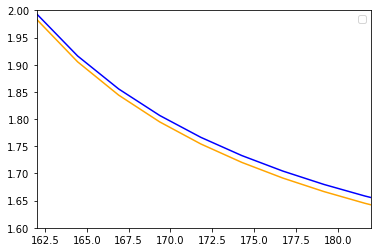

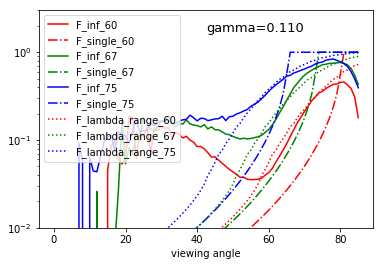

In [19]:
from TSTR_fit_new import get_relative_gaussian_weights

# Sellmeier equation for n_LXe vs wavelength
def n_Sel(lambda_,a0,aUV,aIR):
    return np.sqrt(a0+aUV*lambda_**2/(lambda_**2-146.9**2)+aIR*lambda_**2/(lambda_**2-827.0**2))

params_Sel_162=[1.45541588, 0.44780067, 0.00170906] # From overall fit to Sinnock data plus Grace plot at 178 nm; for ~162 K
params_Sel_178=[1.40705316, 0.449238886, 0.00128087090] # For ~178 K

mu_lambda = 178
# FWHM is ~4 nm/mm slit size; estimated to be ~3 nm for Run 2 LXe data (slit size ~0.75 mm)
sigma_lambda = 5.64#1.49#4#14/2.355#1.0# in nm; divide by 2.355 to convert from FWHM, assuming Gaussian
sigma_n = sigma_lambda/20 # Use a Gaussian in index; scale to a reasonable sigma
n_samples = 30
lambda_list = np.linspace(-2 * sigma_lambda + mu_lambda, sigma_lambda * 2 + mu_lambda,n_samples)
weights_list = get_relative_gaussian_weights(lambda_list, mu_lambda, sigma_lambda)

# Plot n vs wavelength
lambda_full_list=np.linspace(162,650,200)
n_calc_161_full=n_Sel(lambda_full_list, *params_Sel_162)
n_calc_178_full=n_Sel(lambda_full_list, *params_Sel_178)

plt.figure()
plt.plot(lambda_full_list, n_calc_161_full, color="b")
plt.plot(lambda_full_list, n_calc_178_full, color="orange")
plt.legend()
plt.xlim(162,182)
plt.ylim(1.6,2.0)

# Plot F_inferred to compare to F from range of wavelengths
plt.figure()
plt.plot(th_r_deg,F_inf_60,color="r",label="F_inf_60")
plt.plot(th_r_deg,F_calc,color="r",linestyle='-.',label="F_single_60")
#plt.plot(th_r_deg,F_indiv_fit_60,color="r",linestyle=':',label="F_sigmoid_indiv_60")
#plt.plot(th_r_deg,F_sigmoid_global_60,color="r",linestyle=':',label="F_sigmoid_fit_60")
plt.plot(th_r_deg,F_inf_67,color="g",label="F_inf_67")
plt.plot(th_r_deg,F_calc_67,color="g",linestyle='-.',label="F_single_67")
#plt.plot(th_r_deg,F_indiv_fit_67,color="g",linestyle=':',label="F_sigmoid_indiv_67")
#plt.plot(th_r_deg,F_sigmoid_global_67,color="g",linestyle=':',label="F_sigmoid_fit_67")
plt.plot(th_r_deg,F_inf_75,color="b",label="F_inf_75")
plt.plot(th_r_deg,F_calc_75,color="b",linestyle='-.',label="F_single_75")
#plt.plot(th_r_deg,F_indiv_fit_75,color="b",linestyle=':',label="F_sigmoid_indiv_75")
#plt.plot(th_r_deg,F_sigmoid_global_75,color="b",linestyle=':',label="F_sigmoid_fit_75")

# Plot F using range of wavelengths
theta_i_list = [60, 67, 75]
colors=["r","g","b","m","c","y"]
for i_th in range(len(theta_i_list)):
    theta_i_deg = theta_i_list[i_th]
    theta_i = theta_i_deg*np.pi/180
    F_weighted_sum = 0
    for ii in range(len(lambda_list)):
        lambda_i = lambda_list[ii]
        weight_i = weights_list[ii]
        n_LXe_i = n_Sel(lambda_i, *params_Sel_162) # calculate LXe index for this wavelength
        #n_LXe_i = 1.69100164+(lambda_i-mu_lambda)*sigma_n/sigma_lambda # Just use a Gaussian in n
        F_tmp = F_single(th_prime(theta_i,th_r),n_LXe_i,n_mean)*weight_i
        F_weighted_sum += F_tmp
    F_avg = F_weighted_sum/np.sum(weights_list)
    plt.plot(th_r_deg, F_avg, color=colors[i_th],linestyle=':',label="F_lambda_range_{0}".format(theta_i_deg))
#     F_weighted_sum = 0
#     for ii in range(len(lambda_list)):
#         lambda_i = lambda_list[ii]
#         weight_i = weights_list[ii]
#         #n_LXe_i = n_Sel(lambda_i, *params_Sel_162) # calculate LXe index for this wavelength
#         n_LXe_i = 1.69100164+(lambda_i-mu_lambda)*sigma_n/sigma_lambda # Just use a Gaussian in n
#         F_tmp = F_single(th_prime(theta_i,th_r),n_LXe_i,n_mean)*weight_i
#         F_weighted_sum += F_tmp
#     F_avg = F_weighted_sum/np.sum(weights_list)
#     plt.plot(th_r_deg, F_avg, color=colors[i_th],linestyle='--',label="F_n_range_{0}".format(theta_i_deg))

#plt.gca().axhline(y=0.5)
plt.yscale('log')
plt.ylim(1e-2,.3e1)
plt.text(0.5,0.9,"gamma={0:.3f}".format(gamma),transform=plt.gca().transAxes,fontsize=13)
plt.xlabel("viewing angle")
plt.legend()

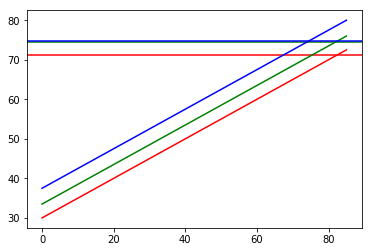

In [31]:
#Checking theta_prime vs theta for different angles and where this corresponds to theta_crit for different indices
plt.plot(th_r_deg,th_prime(60*np.pi/180,th_r)*180/np.pi,color="r")
plt.gca().axhline(y=np.arcsin(1.599/1.69)*180/np.pi,color="r")
plt.plot(th_r_deg,th_prime(67*np.pi/180,th_r)*180/np.pi,color="g")
plt.gca().axhline(y=np.arcsin(1.629/1.69)*180/np.pi,color="g")
plt.plot(th_r_deg,th_prime(75*np.pi/180,th_r)*180/np.pi,color="b")
plt.gca().axhline(y=np.arcsin(1.63/1.69)*180/np.pi,color="b")

0.0005530843701478336


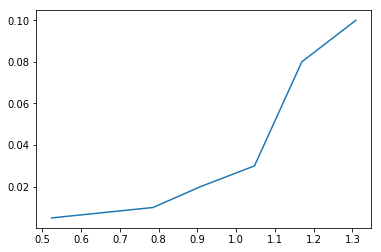

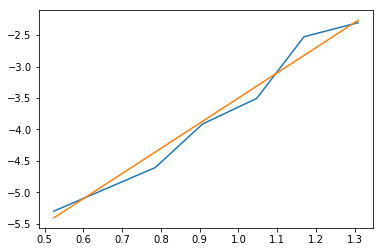

In [51]:
angles=np.array([30,45,52,60,67,75])*np.pi/180
F_mins=np.array([.005,.01,.02,.03,.08,.1])
plt.plot(angles,F_mins)
plt.figure()
plt.plot(angles,np.log(F_mins))
plt.plot(angles,angles*4-7.5)
print(np.exp(-7.5))

20.17464636337149
29.514681332787628


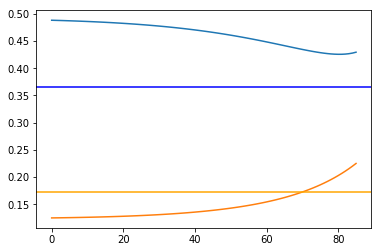

In [25]:
# Specular lobe is P times the scaling factor given here; should roughly match N_sp/(4*cos(th_i)) from simple fits (if gamma is unchanged)
plt.plot(th_r_deg,F_single(th_prime(75*np.pi/180,th_r),n_LXe,10.1)/(4*np.cos(75*np.pi/180)))
plt.gca().axhline(y=0.379/(4*np.cos(75*np.pi/180)),color="b")
plt.plot(th_r_deg,F_single(th_prime(67*np.pi/180,th_r),n_LXe,4.34)/(4*np.cos(67*np.pi/180)))
plt.gca().axhline(y=0.269/(4*np.cos(67*np.pi/180)),color="orange")

gamma=0.076
print(P(alpha_specular(75*np.pi/180, 75*np.pi/180))*.379/(4*np.cos(75*np.pi/180)))
gamma=0.068
print(P(alpha_specular(75*np.pi/180, 75*np.pi/180))*F_single(th_prime(75*np.pi/180,75*np.pi/180),n_LXe,10.1)/(4*np.cos(75*np.pi/180)))

# Looks like for 75 deg, simple fit scaling factor is smaller; but also gamma is larger? 

In [ ]:
# trying shifting n_range so that n is at top (bottom) of range doesn't help (worse for bottom)

# need F (or its generalized replacement) to be flat and a decent size for high angles
# judging from individual fits of full model, F should be ~0.5 for 75 deg, ~0.2 for 67 deg; no longer flat at 60 deg
# individual fits have gamma decreasing w/ higher angle, so difference at different incident angles should be even larger if gamma is fixed
# individual simple fits (where gamma affects only peak width, since height is its own parameter) also have gamma decrease w/ higher angle
# specular lobe raw data features: 
#      lobe narrows at higher incident angles 
#      also gets larger (more so than just 1/cos(theta_i) factor), suggesting prefactor (F or equiv) also gets larger (could also be from gamma decreasing)
#      requires no shape correction at 67, 75 deg, so prefactor should be flat in theta_r (down to ~40 deg) for those angles
#      shows peak shift for 60 deg, so prefactor should have some kind of turn-on in theta_r for this angle
# n_PTFE << n_LXe gives flat F (= 1) vs theta_r for many angles, but no turn-on for 60 deg, equal prefactor for 67 and 75 deg
# n_PTFE <~ n_LXe gives flat F (= 1) vs theta_r for high angles, but cuts off too early for 67 deg; turn-on for 60 deg is too sharp
# using n_PTFE <~ n_LXe with n_range smooths out turn-on for 60 deg; if n_range is too large, peak shifts back to ~60 deg (other problems?)
# Making gamma decrease at higher theta_i means a suppressed 60 deg peak, could allow for higher n_range values

# Figure out why global fit has peak at 75 deg higher than 67 deg (partly from 1/cos(theta_i), 2.6 vs 3.9, but is that enough?)
# Increasing scaling factor from simple fits (and decreasing gamma) suggests that doesn't fully account for difference
# Check full model using fit params and compare peak at 67 vs 75 (is P the same? F?)
#     P is the same at 67, 75 degrees (for peak); F is larger for 75 degrees (F_67/F_75 = 0.52 for n_range=0.22), due entirely to n_range>0
#     For full model, ratio of peak heights is F_67/F_75 * (2.6/3.9) (cos factor) = 0.35
#     For simple model, ratio of peak heights is N_sp_67/N_sp_75 * (2.6/3.9) * P_67/P_75 = 0.40 

# Judge why higher n_range values start giving poor fit (look at chi^2 for specific incident angles):
#     Looks like the peaks at 60, 67 deg get pulled too far to the left as n_range increases
# Check if larger n_range values become favorable when gamma changes w/ theta_i:
#     Seems roughly true, but not enough to get n_range much larger; helps for 60 deg, but main issue is then 67 deg peak (wants to be taller, narrower, i.e. closer to 75 deg)

# Check if changing n w/ mean(theta_i) helps? (could have lower n at higher angles; about 0.1 per 7 deg could do it)
#     No theta_i dependence can beat results from individual angle fits; still can't get a good fit at 60 deg w/o large angle shift, unphysical index
# Low index fit for 67 deg is also poor even when n_PTFE is lowered: F=1 is too large, even small gammas give too wide a distribution
# even small n shows too dramatic a cutoff for low angles; also want small peak shift for 67 deg (so F isn't really constant)

# try looking for reference of BRIDF (BRDF) for anything in liquid of higher index (not much luck)

# Tried fitting global data w/ different forms for F, all centered on theta_crit, w/ a variable width parameter:
#     Best results used logistic function; does better than F_nrange (also fewer artefacts from its piecewise form)
#     Poor results when centering function on a fixed angle
#     Extends to lower angles than n_range, overshoots less at intermediate angles

# Try doing individual angle fits w/ logistic form for F
#     Done, see steady increase in n and K with angle, decrease in gamma; 
#     Increase in K means wider sigmoid 
#     Increase in n means critical angle pulled to higher viewing angles vs incident angle compared to fixed n
#     Individual fits give wide sigmoids centered at relatively high angles, to help extend tails
#     Note that strategy requires gamma to change vs angle; also have to shift 67 degree data or fit is much worse

# If pursuing logistic fits more:
#     Check adjusting theta_crit (shouldn't really be at F=0.5); affects W
#     Increasing theta_crit by constant pulls n down, makes diffuse component at 67 deg slightly better (for +2 deg; larger reduces specular peaks too much)
#     Could also try adjusting W to use new F? 
#     W_i using new F gives worse fit (diffuse component for 67 deg is pulled further up, away from data)
#     This happens bc previous F with large n_range gave a slightly smaller F(theta_i) (larger 1-F); 
#     For n_range=0, using new F gives better fit (again due mainly to 67 deg diffuse component)

# Conclusions:
#     F requires some modification to match data (just changing gamma, n vs angle doesn't allow a good fit for 60 deg)
#     Specifically, the leading edge must be smoothed out and extended considerably
#     Just adding a finite n_range helps considerably, allows decent fit for TR distribution (still somewhat worse than BC)
#     Can do slightly better by using a logistic function for F, using theta_crit as the center and a floating width parameter
#     Individual fits prefer larger indices (critical angle pulled to higher viewing angles compared to fixed n), lower gammas, larger widths
#     Still want a finite n_range to match W_i (diffuse component at 67 deg); could also use logistic F here, with slightly worse results
#     Adding linear change in gamma vs theta_i (or n vs theta_i) doesn't help much: 
#     this pulls height of specular peak at 67 closer to 75, which has to be offset by also narrowing peak at 67

# For paper:
#     For vacuum data, show a sample fitted dataset and params (for reproducing fits/modeling); note that index is likely wrong due to degeneracy w/ gamma
#     Give a table of fit parameters for different samples? Probably not worth rigorously estimating parameter uncertainties, but could give an indication of rough precision
#     Diffuse/specular integrated reflectances best extracted using empirical fits for LXe data; use Spectralon calibration for uncertainty estimate?
#     Comparing vacuum vs LXe, really want to use ratio of diffuse reflectances, not albedo (but can discuss comparison if needed)
#     Specular reflectance is obviously larger in LXe, can also comment on this (for fixed angle?)
#     Index is maybe less interesting in the absence of a complete model, but can estimate
#     Easier to estimate index using pressure data or turn on of specular peaks in global fits?
#     Estimate will depend on form of F; could compare F from single index fit vs n_range fit vs sigmoid fit to estimate uncertainty
#     Can include a section discussing attempts at a complete model in LXe and their limitations
#     Could be used to extrapolate to unmeasured angles in sims; show one example plot plus fit params for model of choice?
#     Include a discussion of qualitative features of data and how model accounts for them
#     Specifically, mention peak shifts, required modification to F, attempts at individual fits, and observed pressure dependence
#     Can speculate about physical causes for shape of data, without specific conclusions (e.g. range of PTFE indices or beam wavelengths; probably former given mineral oil measurements w/ laser)
#     Should also discuss how LXe reflectances are smaller than inferred from total reflectance measurements, also closer to vacuum data
#     Possible explanations: different sample surface prep, errors in extrapolation out of plane, 
#     physical differences between setups (geometry, fluorescence, bubbles, broader wavelength range for true LXe fluorescence)
#     Discussion of bubbles?
#     Compare to predictions, e.g. p. 199 of Claudio's thesis indicating 0 deg hemispherical reflectance increases 10-20% in LXe
#     Discussion on what can/can't be inferred for other PTFE samples:
#         n likely changes slightly but not too much
#         ratio of specular/diffuse should be fairly reliable (though depends somewhat on surface prep since that may affect albedo)
#         width/height of specular peak will depend on surface finish

# Data for paper:
#     Vacuum - plot of sample data with global fit; table of global fits (include chi^2?); include integrated reflectance at some angle? or bi-hemispherical reflectance? separate by diffuse/specular?
#     LXe - table of empirical fits at each incident angle; include chi^2?; include integrated reflectance (diffuse and specular)
#     Plot of pressure increase data; discussion or table for pressure dependence of other samples 
#     Table of indices for different samples in LXe (find a way to estimate error?)
#     Plot(s) of measurements in LXe at different wavelengths, discussion of features of data (empirical fits/reflectances?)
#     Plot of sample data w/ global fit w/ nominal F and modified F (n range? or logistic? or gaussian?) to illustrate gaps in model
#     Plot of diffuse/specular reflectivity vs angle for vacuum (model, all angles), LXe (model or empirical fits?); uncertainty bands?

# Check integrated reflectance for logistic form of F - seems reasonable
# Check if pressure dependence is still borne out in models where F is smoothed out more - looks substantial for n_range=0.22:
#   60 deg max height drops ~35% in model relative to n=1.69 (for fixed fit parameters); integrated specular reflectance also changes ~35% at 60 deg
#   Same for F_sigmoid (about 35% drop in peak at 60 deg and in integrated 60 deg reflectance)
# Do same check for wavelength averaging case: 
#   Diffuse integral is very similar, slightly higher at intermediate wavelengths for higher pressure
#   Specular 60 deg integral drops ~20% in model relative to n=1.69 (for fixed fit params); 17% for 65, 14% for 70, 11% for 75 deg

# Comparison w/ MC: looks good except diffuse component at high viewing angles; MC shows less difference between 60, 67, 75 degrees than ours
#   but our data seems likely to prefer our analytical model
# Expect n_LXe changes more strongly than n_PTFE (n_LXe changes from 1.39-1.84 for 400-165 nm vs n_PTFE changes 1.34-1.65 from LXe fits over same range)
# Coimbra data suggests n_PTFE from vacuum is ~1.5 at 175 nm, ~1.3-1.35 at 250-550 nm
# But this may not be true in the immediate vicinity of 178 nm: PTFE absorption edge is at 161 nm (ref?)

#   Try changing functional form of n_PTFE vs wavelength; data on PTFE absorption from Claudio's ref 118, 229 
#   Ref 229 uses Cefral Lube (TFO-I) from Central Glass; may be a low molecular weight version?
#   "Correct" location for absorption edge could be 165-155 nm (a little wider than FWHM of absorption peak)
#   Later reference gives its center more precisely as 161.9 nm (also lists 162.4 nm, but that may be for PFT?)
#   See if wavelength range can explain difference in data w/ different slit sizes (seems like the modeled effect doesn't match data)
#   See if wavelength range can explain data at other wavelengths (using just n_LXe, spread in wavelength from fits is similar for 165 nm, 178 nm; slightly higher for 165 nm, also larger slit width)
#   Check form of n/n_LXe with wavelength range that fits data well (esp at low wavelength); either changing n_LXe or both it and n_PTFE
#   Looks like w/ flat PTFE index, n/n_LXe is skewed to low values (further from n=n_LXe), extending TIR range and hence left tail of specular peaks
#   With PTFE index from Sellmeier eqn, n/n_LXe is skewed to high values (closer to n=n_LXe), slightly pulling up diffuse component at high incident/viewing angles, pulling specular peaks right and slightly smaller
#   When allowing corresponding width to vary in fit, data at 165 nm slightly prefers an unskewed Gaussian in n/n_LXe to this skewed distribution (better at specular angles, slightly worse for diffuse)
#   Using the same form of n_LXe but reversing its shape (to mimic n_PTFE changing more strongly and hence skew n/n_LXe the other way) gives a noticeably worse fit
#   178 nm data also prefers unskewed Gaussian in n/n_LXe; corresponds to a slightly wider range in n/n_LXe than best fit using n_LXe from Sellmeier
#   Seems that unskewed version fits peaks slightly better, skewed version matches tails slightly better; overall very little difference
# Data at 178 nm seems to want a range of n/n_LXe of ~0.9-1.0; 
# Can achieve this using calculated n_LXe for a linear n_PTFE vs wavelength slope of -0.08 (sigma=1 nm), -0.065 (1.27 nm, nominal), -0.045 (2 nm), -0.028 (4 nm), -0.025 (5 nm)
# Similar calculation for 165 nm: needs n_PTFE vs wavelength slope of -0.392 (sigma=1 nm), -0.268 (1.53 nm, nominal), -0.214 (2 nm), -0.131 (4 nm), -0.119 (5 nm)
# [Calculated using high-index fit at n=1.95; for low index fit of n=1.87, get slopes of -0.297 (sigma=1 nm), -0.205 (1.53 nm, nominal), -0.165 (2 nm), -0.104 (4 nm), -0.095 (5 nm)]
# These numbers are not unreasonable, but are somewhat inconsistent: the slopes required for the 178 nm data (even for large wavelength ranges)
#   imply a larger difference in index at 165 vs 178 than the 1.59 vs 1.87 seen; 
#   that could potentially be addressed by shifting n_PTFE at 165 nm up (value at 178 nm is fairly constrained) and/or reducing the slope of n_LXe vs wavelength near 178 nm
#   Shifting the point at 165 nm to higher wavelengths could help; shifting both points would help less, but is somewhat degenerate w/ reducing the n_LXe slope
#   n_LXe slope at 178 nm is -0.010 for nominal fit (fixing n_LXe to 1.691 at 178 nm); -0.0096 for shift of -0.01 (giving n_LXe for true scintillation spectrum at 1.69)
#   Given the small slope in n_LXe ~178 nm (<0.015 even for 174 nm), reducing it is unlikely to have a large effect unless the wavelength range is quite wide (e.g. 4 nm, where PTFE slope should be -0.028)
# For 400 nm, slope for n_LXe is very close to 0, should be negligible
# Range of indices from best fit varies from -0.055 to -0.13 depending on fit (-0.077 for most reliable?)
# Corresponds to n_PTFE slope of -0.078/nm (sigma=1 nm), -0.039 (2 nm, close to nominal), -0.02 (4 nm), -0.016 (5 nm)

# Check for effects of purity: got dramatically worse during 3rd run; compare first and last M17 measurements

(0.44434044279332874, 8.29663210966114e-07) (0.29431532705499963, 8.298768798653544e-06) 0.7386557698483284


C:\Users\swkra\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


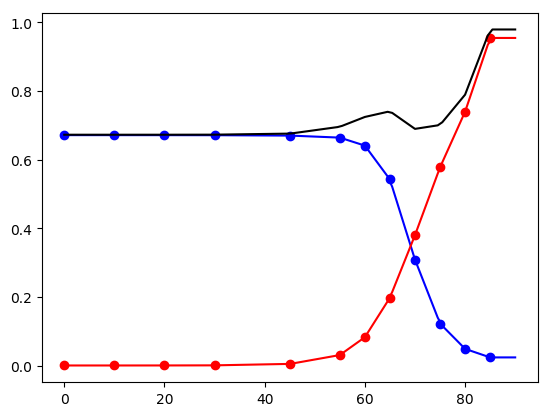

In [103]:
from scipy.interpolate import interp1d
from scipy import integrate
x = np.array([0,10,20,30, 45.1, 55, 60, 65, 70, 75, 80, 85])*np.pi/180#x = np.linspace(0, 10, num=11, endpoint=True)
#y = [0.67007, 0.67004, 0.66999, 0.66984, 0.66843, 0.66106, 0.62666, 0.50303, 0.30878, 0.12308, 0.04947, 0.02462]#y = np.cos(-x**2/9.0)
y = [0.6715134167065824, 0.6714853609714969, 0.6714421935374175, 0.6713127787644213, 0.6701439586550816, 0.6643050005459191, 0.6409912810309316, 0.5423901276175388, 0.3093725442548185, 0.12331615489025698, 0.04956517979944786, 0.024666187267823915]
#y_spec = [0.0014188411412140378, 0.001431907642593201, 0.0015159581374150227, 0.0018842387090620644, 0.007265352611230925, 0.03963603057177141, 0.10358179399254425, 0.2400332573988373, 0.4429704818620232, 0.6440315962968354, 0.7935845190765715, 0.9996177076083168]
y_spec = [0.0011803678022674808, 0.0011910321514857327, 0.0012596389942219881, 0.0015557156196008767, 0.005811796424766054, 0.031535120778654335, 0.08341341643011518, 0.1984864758988867, 0.38032487887665684, 0.5776807997683754, 0.7396554874419252, 0.9542941981495459]

f = interp1d(x, y)
f_spec = interp1d(x, y_spec)

def f_ext(x_list, interp_func):
    
    def pointwise(x_):
        if x_<0: return interp_func(0)
        if x_>85*np.pi/180: return interp_func(85*np.pi/180)
        else: return interp_func(x_)
        
    if np.size(x_list)<2: return pointwise(x_list)
    
    return np.array([pointwise(x) for x in x_list])

xnew = np.linspace(0,np.pi/2,100)
plt.plot(x*180/np.pi, y, 'bo', xnew*180/np.pi, f_ext(xnew, f), 'b-')
plt.plot(x*180/np.pi, y_spec, 'ro')
plt.plot(xnew*180/np.pi, f_ext(xnew, f_spec), 'r-')
plt.plot(xnew*180/np.pi,f_ext(xnew, f)+f_ext(xnew, f_spec),'k-')


def integral_func(x_, interp_func):
    return np.sin(x_)*f_ext(x_, interp_func)
    
integral_results_diff = integrate.quad(integral_func, 0, np.pi/2, f)
integral_results_spec = integrate.quad(integral_func, 0, np.pi/2, f_spec)
print(integral_results_diff, integral_results_spec, integral_results_diff[0]+integral_results_spec[0]) 
